In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras 
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# Reading the Train and test dataset's
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [4]:
# seperating actual labels from the pixel values.
X_train = np.array(train.drop('label', axis = 1))
Y_train = np.array(train['label'])

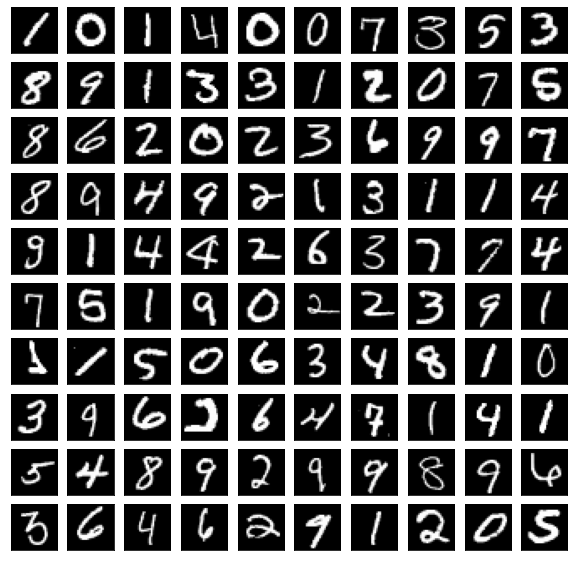

In [5]:
# visualization of the 100 labels
plt.figure(figsize =(10, 10))
for i in range(100):
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape(28,28), cmap = 'gray')
plt.show()

In [6]:
# checking the shapes and reshaging if required 
X_train.shape

(42000, 784)

In [7]:
# One Hot Encoding the labels
Y_train_enc = to_categorical(Y_train, num_classes = 10)
Y_train_enc[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
# Defining the Neural Network model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(10, activation='sigmoid'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [10]:
# compiling the model with the loss function
# ref-https://keras.io/api/optimizers/
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics = ['accuracy'])

In [12]:
# fitting the model
model.fit(X_train, Y_train_enc, batch_size=100, epochs=100)

Epoch 1/100
420/420 [==============================] - 3s 5ms/step - loss: 1.7501 - accuracy: 0.4146
Epoch 2/100
420/420 [==============================] - 2s 4ms/step - loss: 1.1459 - accuracy: 0.6407
Epoch 3/100
420/420 [==============================] - 2s 4ms/step - loss: 0.9119 - accuracy: 0.7190
Epoch 4/100
420/420 [==============================] - 2s 4ms/step - loss: 0.7819 - accuracy: 0.7591
Epoch 5/100
420/420 [==============================] - 2s 4ms/step - loss: 0.6869 - accuracy: 0.7945
Epoch 6/100
420/420 [==============================] - 2s 5ms/step - loss: 0.6174 - accuracy: 0.8162
Epoch 7/100
420/420 [==============================] - 2s 5ms/step - loss: 0.5716 - accuracy: 0.8346
Epoch 8/100
420/420 [==============================] - 2s 5ms/step - loss: 0.5183 - accuracy: 0.8537
Epoch 9/100
420/420 [==============================] - 2s 5ms/step - loss: 0.4895 - accuracy: 0.8618
Epoch 10/100
420/420 [==============================] - 2s 5ms/step - loss: 0.4573 - accura

420/420 [==============================] - 2s 5ms/step - loss: 0.1335 - accuracy: 0.9665
Epoch 82/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1295 - accuracy: 0.9668
Epoch 83/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1291 - accuracy: 0.9663
Epoch 84/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1259 - accuracy: 0.9675
Epoch 85/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1260 - accuracy: 0.9671
Epoch 86/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1267 - accuracy: 0.9667
Epoch 87/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1233 - accuracy: 0.9678
Epoch 88/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1248 - accuracy: 0.9680
Epoch 89/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1265 - accuracy: 0.9673
Epoch 90/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1207 - accuracy: 

In [13]:
# predicting the test labels given the tset dataset.
Y_predict = model.predict(test)
Y_predict = np.argmax(Y_predict, axis=1)

In [14]:
# printing predictions
Y_predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [15]:
# ref -https://stackoverflow.com/questions/34864695/saving-prediction-results-to-csv
# prediction = pd.DataFrame(Y_predict).to_csv('prediction.csv')


# Saving predictions as CSV file to submit
# to submit the prediction to kaggle we need to rename the index column  
# Also increament the index value by 1 as submission starts index start from 1 to 28000
# incremented in above cell



res = pd.DataFrame(Y_predict)
res.index = test.index + 1 # its important for comparison
res.columns = ["Label"]
res.index.rename('ImageId', inplace = True)
res.to_csv("prediction_results.csv")

# Here is the screenshot of the attached predicted submissions.
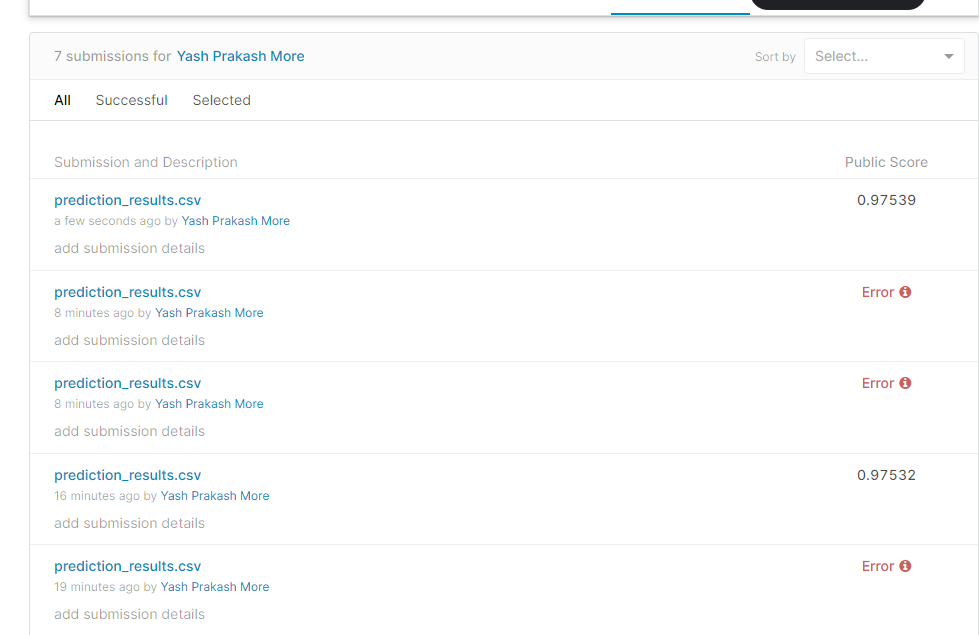